In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 152)
pd.set_option('display.max_rows', 152)

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.drop('member_id',axis=1,inplace=True)

C:\python\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df[df['issue_d'].notna()]
df['year']=df.issue_d.map(lambda x:int(x.split('-')[-1]))

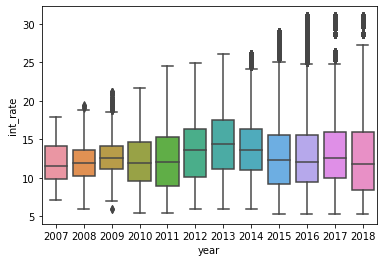

In [4]:

# how does interest rate vary per year
sns.boxplot(x = 'year', y = 'int_rate', data = df) 
#1

Text(0.5, 1.0, 'Frequency of loan per year')

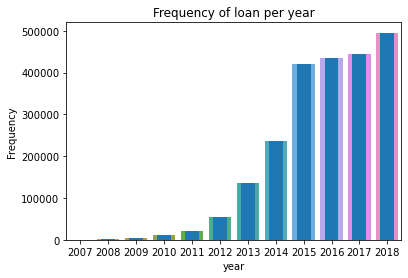

In [5]:
'''
    How does the issued loans vary year after year?
    
     Their largest period of growth occurred between 2012 & 2014, when they received investments from Google, 
     John Mack (former Morgan Stanley CEO), surpassed $1 Billion in total loans & filed for their IPO.
'''

'''
a
'''
sns.countplot(x='year',data=df)
df.year.value_counts(ascending=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title("Frequency of loan per year")
#2

Text(0.5, 1.0, 'Average loan ammount issued per year')

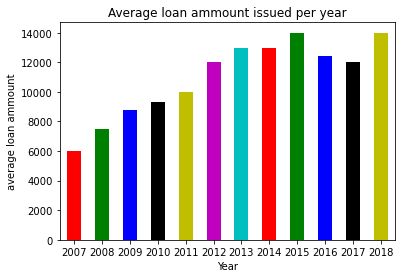

In [6]:

color = list('rgbkymc')
df.groupby('year')['loan_amnt'].agg('median').plot(kind='bar',color=color)
#sns.boxplot(x='year',y='loan_amnt',data =df)
plt.xlabel('Year')
plt.ylabel('average loan ammount')
plt.xticks(rotation=0)
plt.title('Average loan ammount issued per year')
#3

Text(0.5, 1.0, 'Loan ammount Frequency for Fully paid and defaulted ')

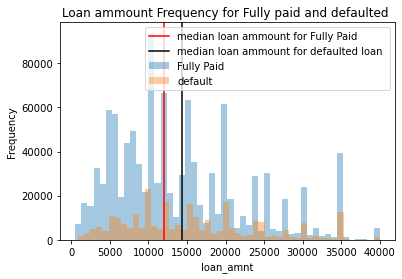

In [7]:
med = []

temp = df[df.loan_status=='Fully Paid']
med.append(temp['loan_amnt'].median() )
sns.distplot(temp.loan_amnt,bins=50,kde=False,label='Fully Paid')
#plt.avxline(median)

temp = df[df.loan_status=='Charged Off']
med.append(temp['loan_amnt'].median() )
sns.distplot(temp.loan_amnt,bins=50,kde=False,label='default')

colors = ['r','k']
status = ['Fully Paid','defaulted loan']
for xc,c,s in zip(med,colors,status):
    plt.axvline(x=xc, label='median loan ammount for {} '.format(s), c=c)

plt.ylabel('Frequency')
plt.legend()
plt.title('Loan ammount Frequency for Fully paid and defaulted ')
#4

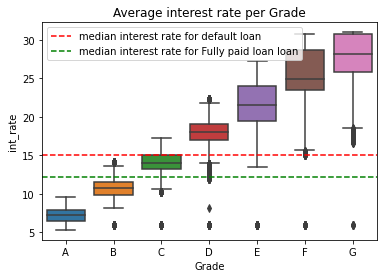

In [8]:
'''
b
'''

#df.groupby('grade')['int_rate'].agg({"":'median'}).unstack(1).plot(kind='bar')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='grade',y='int_rate',data=df,order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
#plt.xticks(["A","B","C","D","E","F","G"])
positions = range(0,7)
labels = ("A","B","C","D","E","F","G")
median = df.int_rate.median()
#plt.axhline(median,color='r',label = 'median interest rate for all loan',)
sns.set(rc={'figure.figsize':(11.7,8.27)})
temp = df[df.loan_status=='Charged Off']
median =temp.int_rate.median()
plt.axhline(median,color='r',label = 'median interest rate for default loan',linestyle ="--")
sns.set(rc={'figure.figsize':(11.7,8.27)})
temp = df[df.loan_status=='Fully Paid']
median =temp.int_rate.median()
plt.axhline(median,color='g',label = 'median interest rate for Fully paid loan loan',linestyle ="--")

plt.title('Average interest rate per Grade')
plt.legend(loc = 'upper left')
sns.set(rc={'figure.figsize':(11.7,8.27)})
#5 

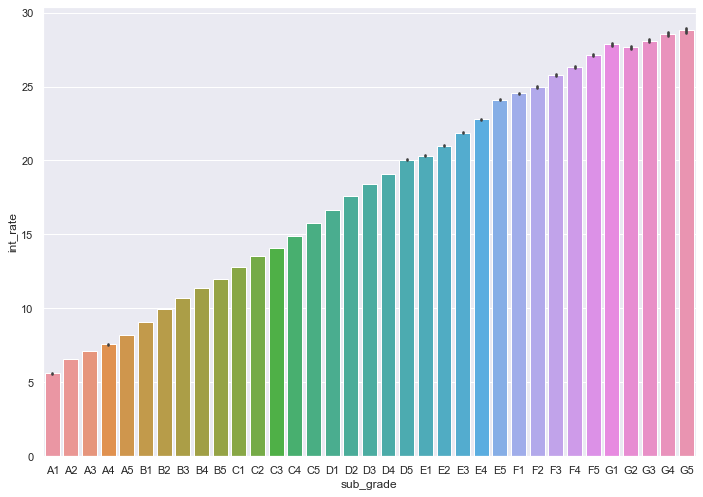

In [9]:
'''
b
'''
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='sub_grade',y='int_rate',data=df,order=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5"])

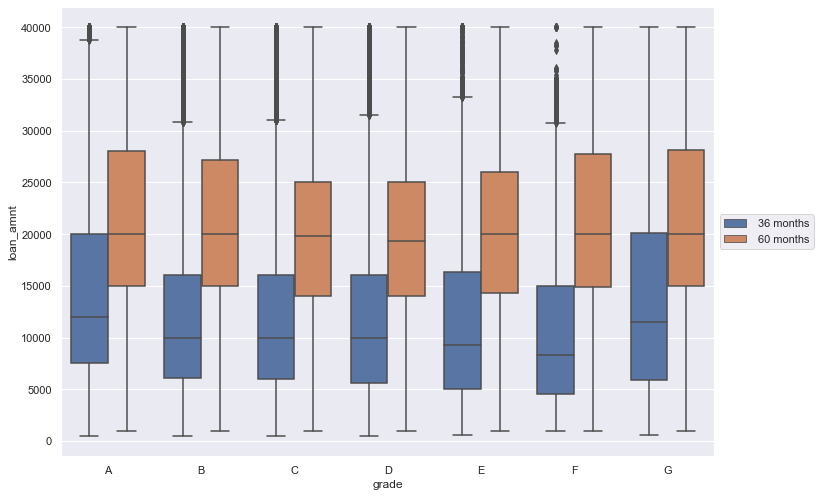

In [10]:
# maybe remove 
g = sns.boxplot(x = 'grade', y = 'loan_amnt', hue ='term' ,data = df,order=['A','B','C','D','E','F','G']) 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# 6 

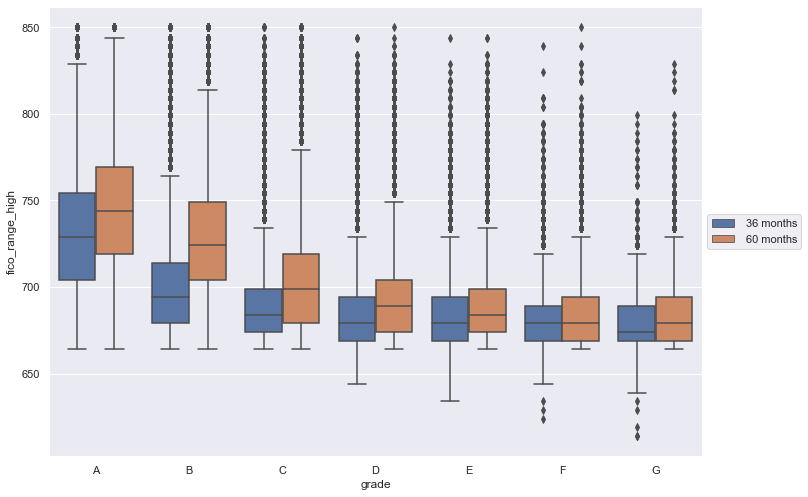

In [11]:
'''
maybe
'''

# FICO credit score lower than 580 as very poor, 580–669 as fair, 670–739 as good, 740–799 as very good, and 800–850 as exceptional.
g = sns.boxplot(x = 'grade', y = 'fico_range_high', hue ='term' ,data = df,order=['A','B','C','D','E','F','G']) 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#7

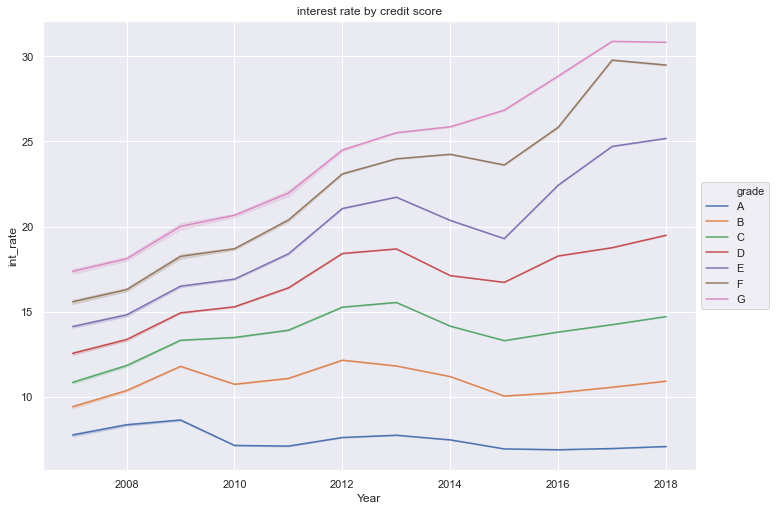

In [12]:

'''

c and c R

'''
g = sns.lineplot(x='year',y='int_rate',hue='grade',data=df,hue_order=['A','B','C','D','E','F','G'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.title('interest rate by credit score')
plt.show()
#8

Text(0.5, 1.0, 'Frequency of loan per class for each grade')

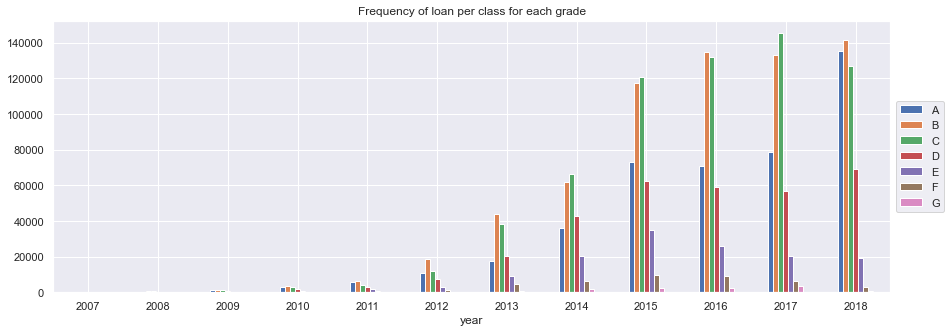

In [13]:
'''
before (c) Not sure
'''

# Frequency of loan per class
# A is increasing the most towards the year
plt.rcParams["figure.figsize"] = [15, 5]
g = df.groupby(['year'])['grade'].value_counts().unstack(1).plot(kind='bar',)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=0)
plt.title('Frequency of loan per class for each grade')
#9

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Text(0.5, 1.0, 'Distribution of loan_status by home_ownership and Grade ')

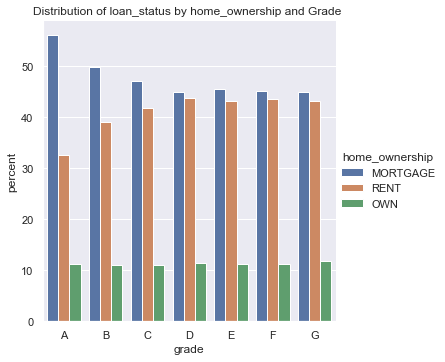

In [14]:
L = ["MORTGAGE","RENT","OWN"]
temp = df[(df.home_ownership==L[0] )| ( df.home_ownership==L[1]) | (df.home_ownership==L[2] ) ]
temp.shape

#g = sns.countplot(x = 'grade',data = temp,hue='home_ownership',order=['A','B','C','D','E','F','G']) 
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

y,x= 'home_ownership', 'grade'
temp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  

plt.title('Distribution of loan_status by home_ownership and Grade ')

<Figure size 1080x1080 with 0 Axes>

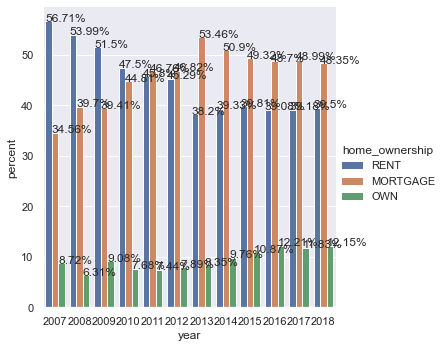

In [15]:
L = ["MORTGAGE","RENT","OWN"]
temp = df[(df.home_ownership==L[0] )| ( df.home_ownership==L[1]) | (df.home_ownership==L[2] ) ]

fig = plt.figure(figsize = [15,15] )

x,y = 'year', 'home_ownership'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



Text(0.5, 1.0, 'different purposes with their interest rate')

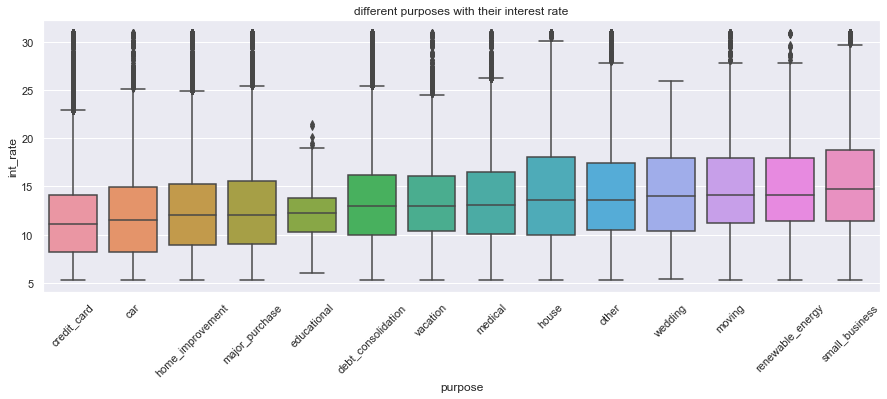

In [16]:

chart = sns.boxplot(x='purpose',y='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('different purposes with their interest rate')



Text(0.5, 1.0, 'different purposes with their interest rate')

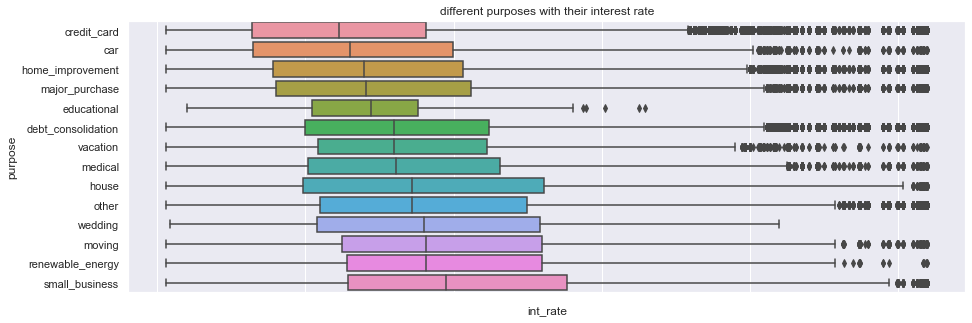

In [17]:
# keep this one 
chart = sns.boxplot(y='purpose',x='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('different purposes with their interest rate')

In [18]:
temp = df.copy()
temp['status'] = df.annual_inc.copy()

temp['status'] = np.where(temp['annual_inc'].between(0,46500), 'first_q',temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(46500,66000), 'second_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(66000,93000), 'third_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(93000,9999999999), 'fourth_q', temp['status'])

temp[['annual_inc','status']]

,annual_inc,status
0,55000.0,second_q
1,65000.0,second_q
2,63000.0,second_q
3,110000.0,fourth_q
4,104433.0,fourth_q
...,...,...
2260694,95000.0,fourth_q
2260695,108000.0,fourth_q
2260696,227000.0,fourth_q
2260697,110000.0,fourth_q


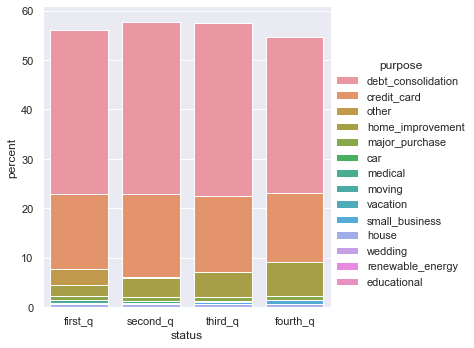

In [19]:
y,x= 'purpose', 'status'
temp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=["first_q","second_q","third_q","fourth_q"],dodge=False)


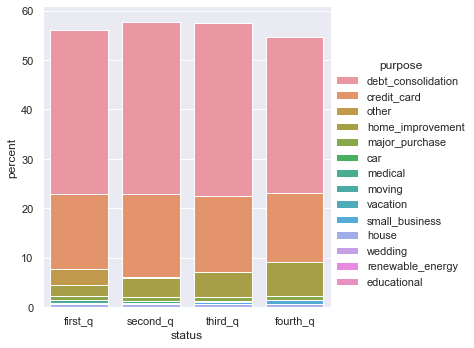

In [20]:
# not important
y,x= 'purpose', 'status'
temp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=["first_q","second_q","third_q","fourth_q"],dodge=False)


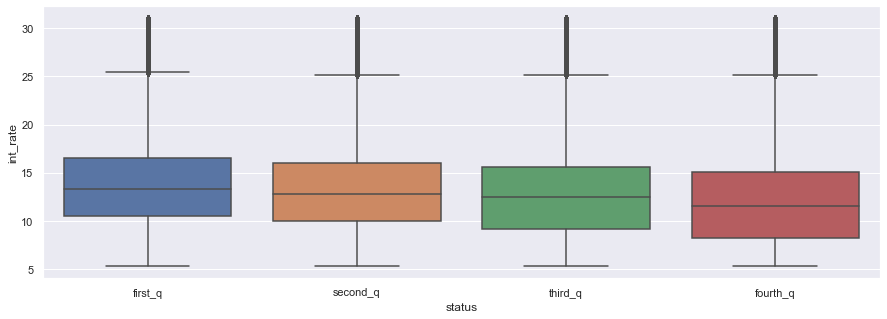

In [21]:
# not important
sns.boxplot(x='status',y='int_rate',data=temp,order=["first_q","second_q","third_q","fourth_q"])

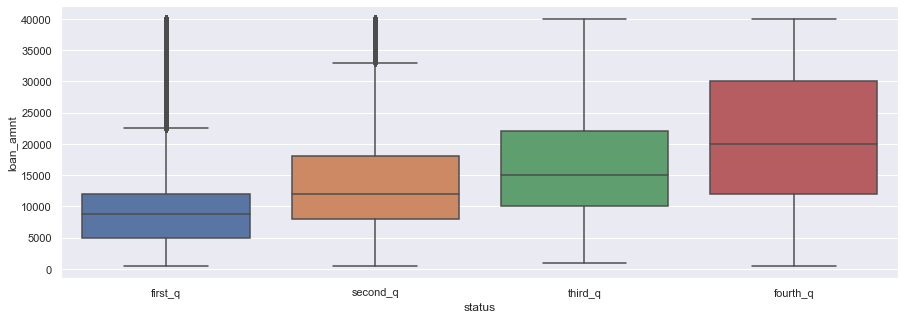

In [22]:
sns.boxplot(x='status',y='loan_amnt',data=temp,order=["first_q","second_q","third_q","fourth_q"])

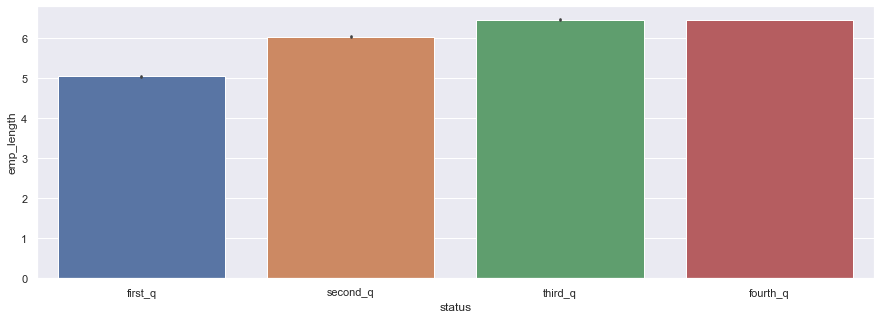

In [23]:
import re
#re.sub("\D", "", temp.emp_length)
#  re.sub("[^0-9]", "", lambda a:temp.emp_length)
temp.emp_length = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True) 
ddd = temp[["emp_length",'status']].dropna()
ddd.emp_length = ddd.emp_length.astype(float)

sns.barplot(x='status',y='emp_length',data=ddd,order=["first_q","second_q","third_q","fourth_q"])

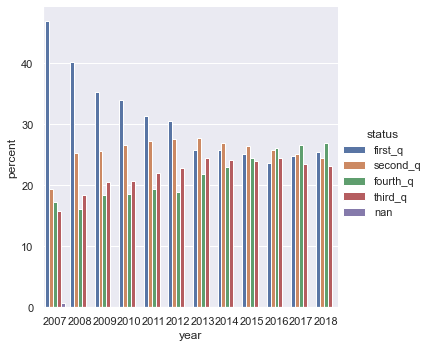

In [24]:
'''
a
Not this plot the new plot
'''
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

In [25]:
# 0 charged off,defalut,'Does not meet the credit policy. Status:Charged Off', 'In Grace Period', 'Late (16-30 days)','Late (31-120 days)'
# 1 current,'Does not meet the credit policy. Status:Fully Paid','Fully Paid',
L = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','In Grace Period','Late (16-30 days)','Late (31-120 days)']
temp = df[['grade','loan_status']]
temp['status'] = temp.loan_status.apply(lambda x:'Good standing' if x in L  else 'Bad Standing' )
#temp = df[ (df.loan_status==L[0]) | (df.loan_status==L[1]) | (df.loan_status==L[2]) | (df.loan_status==L[3]) | (df.loan_status==L[4]) | (df.loan_status==L[5])]
temp.head()

<ipython-input-25-137baaf915f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['status'] = temp.loan_status.apply(lambda x:'Good standing' if x in L  else 'Bad Standing' )


,grade,loan_status,status
0,C,Fully Paid,Bad Standing
1,C,Fully Paid,Bad Standing
2,B,Fully Paid,Bad Standing
3,C,Current,Bad Standing
4,F,Fully Paid,Bad Standing


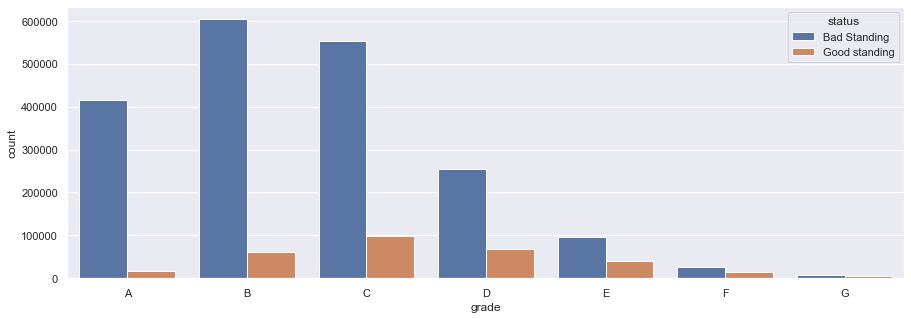

In [26]:
# default rate for each category inn our problem 
sns.countplot(x='grade',hue='status',data=temp,order=["A","B","C","D","E","F","G"])